In [1]:
import h5py
import numpy as np
import sys
sys.path.append('..')
from modules.vizhelpercode import viewArbitraryVolume
from modules.configfile import config, mount_path_prefix
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from ipywidgets import interact, fixed
%matplotlib inline

/home/anmol/.virtualenvs/brats/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def displayMRIandPrediction(mr_im, pr_im, z):
    seq_name = {
        0: 'T1',
        1: 'T2',
        2: 'T1ce',
        3: 'T2flair'
    }

    lab_names = {
                0: 'Necrotic',
                1: 'Edema',
                2: 'Enhancing'
            }

    fig = plt.figure(figsize=(10, 5))
    outer = gridspec.GridSpec(1, 4, wspace=0.2, hspace=0.2)

    c = 0
#     z = 50
#     mr_im = orig_image
#     pr_im = prediction
    for i in range(4):
        inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                        subplot_spec=outer[i], wspace=0.1, hspace=0.1)

        for j in range(2):
            if i == 3 and j == 1:
                ax = plt.Subplot(fig, inner[j])
                ax.imshow(mr_im[i, :,:,z], cmap=plt.cm.Greys_r)
                break

            ax = plt.Subplot(fig, inner[j])

            # plot here
            if j == 0: # this is the top row    
                ax.imshow(mr_im[i, :,:,z], cmap=plt.cm.Greys_r)
                ax.set_title(seq_name[i])
            else:
                ax.imshow(pr_im[i, :,:,z], cmap=plt.cm.Greys_r)
                ax.set_title(lab_names[i])
            ax.set_axis_off()
            fig.add_subplot(ax)

    fig.show()

In [3]:
hdf5 = h5py.File(config['hdf5_filepath_prefix_2017'], 'r')

In [4]:
hf = h5py.File(mount_path_prefix + 'scratch/asa224/model-predictions/BRATS_Validation_Prediction_isensee_main', 'r')

In [5]:
which = 35
print('Patient Name: {}'.format(hdf5['original_data']['validation_data_pat_name'][which]))

Patient Name: Brats17_CBICA_AAM_1


In [18]:
orig_image = hdf5['original_data']['validation_data'][which]
prediction = hf['validation_data'][which]

/home/anmol/.virtualenvs/brats/local/lib/python2.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


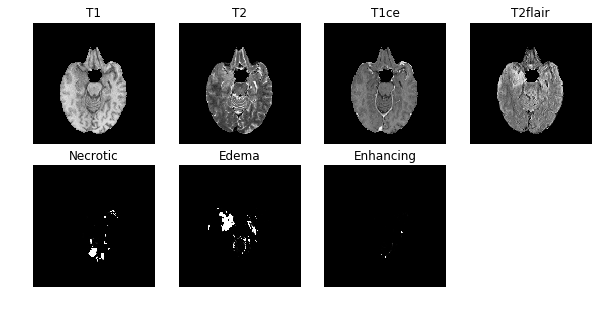

In [7]:
displayMRIandPrediction(orig_image, prediction, 50)

In [8]:
interact(displayMRIandPrediction, mr_im=fixed(orig_image), pr_im=fixed(prediction > 0.1), z=(0, 154))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT03NywgZGVzY3JpcHRpb249dSd6JywgbWF4PTE1NCksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2VzPSh1J3dpZGdldC1pbnRlcmHigKY=


<function __main__.displayMRIandPrediction>

In [13]:
im2 = np.load(open('/mnt/F8B8C1DEB8C19C0E/ownCloud/anmol-work/projects/gui-proj/sample/sample.npy', 'r'))

In [17]:
np.unique(im2)

array([0., 1., 2., 3., 4.])

In [19]:
np.unique(orig_image)

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.228e+03, 1.245e+03,
       1.252e+03], dtype=float32)

In [12]:
import cPickle as pickle
mean_var = pickle.load(open(config['saveMeanVarFilepathHGG'], 'rb'))

In [13]:
mean_var

{'mn': [145.34716865708884,
  137.42872215902062,
  151.753360032083,
  81.51959616536105],
 'var': [101822.61309360887,
  78012.09817628826,
  117914.02394876654,
  22881.293728139655]}

In [14]:
from modules.training_helpers import standardize

In [15]:
a = standardize(orig_image, applyToTest=mean_var)

In [17]:
np.unique(orig_image)

array([-0.5389168 , -0.53230596, -0.5256951 , ...,  4.1085367 ,
        4.3531394 ,  4.95473   ], dtype=float32)

In [16]:
np.unique(a)

array([-0.5389168 , -0.53230596, -0.5256951 , ...,  4.1085367 ,
        4.3531394 ,  4.95473   ], dtype=float32)